### Python Project
### Melissa Nooney
### 8/22/2024

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import my files to work with
COL=pd.read_csv('C:/Users/mnoon/OneDrive/Desktop/R and Python Programming/Python Project/cost_of_living.csv')

salaries=pd.read_csv('C:/Users/mnoon/OneDrive/Desktop/R and Python Programming/Python Project/ds_salaries.csv')

FYI=pd.read_csv('C:/Users/mnoon/OneDrive/Desktop/R and Python Programming/Python Project/Levels_Fyi_Salary_Data.csv')

country_codes=pd.read_csv('C:/Users/mnoon/OneDrive/Desktop/R and Python Programming/Python Project/country_codes.csv')


One of the first things I want to do is figure out what a good cost of living ratio is, so that I may understand 
what the indexes mean in relation to each other. A brief glance at the cost of living file, I can see New York  is 100 across the board.
NY is used as a base value. 


In [5]:
COL.iloc[13]

Rank                                                      NaN
City                              New York, NY, United States
Cost of Living Index                                    100.0
Rent Index                                              100.0
Cost of Living Plus Rent Index                          100.0
Groceries Index                                         100.0
Restaurant Price Index                                  100.0
Local Purchasing Power Index                            100.0
Name: 13, dtype: object

What I want to try to figure out is where is there is indexes under
100, but the salaries are higher, to create a disposible income situation. I also am interested in the Local Purchasing Power Index.
High LPPI and low COL is probably an ideal scenario.
I think some other factors to consider would be quality of life and safety. We can have a very low index, but does location provide a proper
quality of life. Not sure if that's something out of the scope of this project, but definitely a real-world scenario. 
Another scenario is, if I can work remotely, where is the ideal place to make the most money.
Another scenario, if I can't work remote, where is the ideal place to live/relocate for purchasing power and salary "ideal disposable income" situation....the unicorn.

### Breakdown of remote and on-site salaries of Data Scientists

In [6]:
data_science= salaries.loc[salaries['job_title'] == 'Data Scientist'] #create my data science dataframe to work with
data_science.head

<bound method NDFrame.head of      Unnamed: 0  work_year experience_level employment_type       job_title  \
0             0       2020               MI              FT  Data Scientist   
7             7       2020               MI              FT  Data Scientist   
10           10       2020               EN              FT  Data Scientist   
11           11       2020               MI              FT  Data Scientist   
12           12       2020               EN              FT  Data Scientist   
..          ...        ...              ...             ...             ...   
592         592       2022               SE              FT  Data Scientist   
593         593       2022               SE              FT  Data Scientist   
596         596       2022               SE              FT  Data Scientist   
598         598       2022               MI              FT  Data Scientist   
599         599       2022               MI              FT  Data Scientist   

       salary salary_

In [8]:
#not sure I want all these dataframes, but starting here for  now, just to have a bunch of subsetted information
#without having to aggregate and then convert back to a dataframe. I will if/when I need to, but I want to start here.
data_remote= data_science.loc[data_science['remote_ratio'] == 0]
data_hybrid= data_science.loc[data_science['remote_ratio'] == 50]
data_onsite= data_science.loc[data_science['remote_ratio'] == 100]

I think now I want to start working on some cost of living information. I think I want to figure out the locations that
have low COL, and high purchasing power. I might add quality of life later for "fun". 
If 100 is my base number, I can use that to subset my COL dataframe.

In [9]:
unicorn = COL.loc[(COL["Cost of Living Index"] < 100) & (COL["Local Purchasing Power Index"] > 100)]
unicorn.head

<bound method NDFrame.head of      Rank                              City  Cost of Living Index  Rent Index  \
21    NaN  San Francisco, CA, United States                 93.91      108.42   
22    NaN        Oakland, CA, United States                 92.93       87.79   
23    NaN      Anchorage, AK, United States                 91.23       39.29   
24    NaN    Santa Clara, CA, United States                 89.41       90.39   
27    NaN        Seattle, WA, United States                 88.52       65.84   
..    ...                               ...                   ...         ...   
299   NaN    Little Rock, AR, United States                 59.26       25.60   
304   NaN        Wichita, KS, United States                 58.92       24.26   
314   NaN        El Paso, TX, United States                 55.92       23.17   
524   NaN                  Bangalore, India                 28.20        8.59   
547   NaN     Cyberjaya, Selangor, Malaysia                 24.85        6.93  

I need to figure out what a good ratio is. For instance San Fran, COL and purchasing power are very close, I don't feel this trasnlates well to money going far, but does go further than the base of NY. I think I would want a bigger difference between the two. But what is a good difference? The bigger the better? Then let's consider what the pay in those low COL locations could be. In general low COL usually  means lower pay. 

In [15]:
unicorn['differences'] = unicorn["Local Purchasing Power Index"] - unicorn["Cost of Living Index"]
unicorn.head(3)

#add column so I can see the diffrences between the two columns
#I looked up this error below, and doesn't make too much sense too me. I was able to do my calculation, but I didn't want to make a copy

C:\Users\mnoon\AppData\Local\Temp\ipykernel_6992\3015041207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unicorn['differences'] = unicorn["Local Purchasing Power Index"] - unicorn["Cost of Living Index"]


,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,differences
21,NaN,"San Francisco, CA, United States",93.91,108.42,100.72,97.05,93.40,133.16,39.25
22,NaN,"Oakland, CA, United States",92.93,87.79,90.52,98.46,78.71,111.73,18.80
23,NaN,"Anchorage, AK, United States",91.23,39.29,66.88,97.95,78.76,118.63,27.40


Now that I have the cost ofliving somewhat to my liking for now, I want to start breaking down some data science salaries further.

In [16]:
remote_agg = data_remote.groupby('company_location')['salary_in_usd'].agg([np.mean, np.median])
remote_agg.idxmax()

C:\Users\mnoon\AppData\Local\Temp\ipykernel_6992\1677310710.py:1: FutureWarning: The provided callable <function mean at 0x0000016A0CEF0A40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  remote_agg = data_remote.groupby('company_location')['salary_in_usd'].agg([np.mean, np.median])
C:\Users\mnoon\AppData\Local\Temp\ipykernel_6992\1677310710.py:1: FutureWarning: The provided callable <function median at 0x0000016A0D02E480> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  remote_agg = data_remote.groupby('company_location')['salary_in_usd'].agg([np.mean, np.median])


mean      US
median    US
dtype: object

In [19]:
hybrid_agg = data_hybrid.groupby('company_location')['salary_in_usd'].agg([np.mean, np.median])
hybrid_agg.idxmax()


C:\Users\mnoon\AppData\Local\Temp\ipykernel_6992\1408682972.py:1: FutureWarning: The provided callable <function mean at 0x0000016A0CEF0A40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  hybrid_agg = data_hybrid.groupby('company_location')['salary_in_usd'].agg([np.mean, np.median])
C:\Users\mnoon\AppData\Local\Temp\ipykernel_6992\1408682972.py:1: FutureWarning: The provided callable <function median at 0x0000016A0D02E480> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  hybrid_agg = data_hybrid.groupby('company_location')['salary_in_usd'].agg([np.mean, np.median])


mean      US
median    US
dtype: object

In [20]:
onsite_agg = data_onsite.groupby('company_location')['salary_in_usd'].agg([np.mean, np.median])
onsite_agg.idxmax()


C:\Users\mnoon\AppData\Local\Temp\ipykernel_6992\1392500125.py:1: FutureWarning: The provided callable <function mean at 0x0000016A0CEF0A40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  onsite_agg = data_onsite.groupby('company_location')['salary_in_usd'].agg([np.mean, np.median])
C:\Users\mnoon\AppData\Local\Temp\ipykernel_6992\1392500125.py:1: FutureWarning: The provided callable <function median at 0x0000016A0D02E480> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  onsite_agg = data_onsite.groupby('company_location')['salary_in_usd'].agg([np.mean, np.median])


mean      US
median    US
dtype: object

all 3 scenarios have US as the highest paying company location, not too surprising there honestly. My theory at the moment is that if you are to work on site, being located in US is best option. Hybrid work I would say is probably one in the same. For remote work though, potentially being located elsewhere in the world could provide more financial benefits.

### Onsite 

In [36]:
unicorn.nlargest(n=10, columns=['differences'])
#top 10 largest COL and purchasing power differences. This shows me where the COl is relatively low and my dollar will go the furthest


,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,differences
276,NaN,"Houston, TX, United States",63.94,43.38,54.30,61.26,67.45,172.98,109.04
547,NaN,"Cyberjaya, Selangor, Malaysia",24.85,6.93,16.45,26.29,14.60,128.47,103.62
233,NaN,"Dallas, TX, United States",67.85,50.17,59.56,63.61,71.74,170.66,102.81
250,NaN,"Austin, TX, United States",66.50,57.68,62.36,67.33,73.74,158.21,91.71
190,NaN,"Ann Arbor, MI, United States",70.28,47.97,59.82,74.16,63.62,159.99,89.71
130,NaN,"San Jose, CA, United States",73.71,82.30,77.74,70.53,74.25,157.39,83.68
123,NaN,"Fremont, CA, United States",74.12,74.93,74.50,75.40,71.00,157.35,83.23
202,NaN,"Columbus, OH, United States",69.70,37.02,54.38,67.90,68.94,151.29,81.59
227,NaN,"Raleigh, NC, United States",68.20,41.39,55.63,70.36,69.44,144.12,75.92
266,NaN,"Salt Lake City, UT, United States",64.95,42.34,54.35,61.40,65.68,140.61,75.66


In [40]:
top_10 = unicorn.nlargest(n=10, columns=['differences']) #want to create a datframe, so that I can graph this
top_10 = top_10.drop(547) #removing the non-US value because I don't need it for this right now, I also don't want my graph
#to have this value, so really it's now top 9

In [41]:
from plotnine import ggplot, aes, labs, geom_point

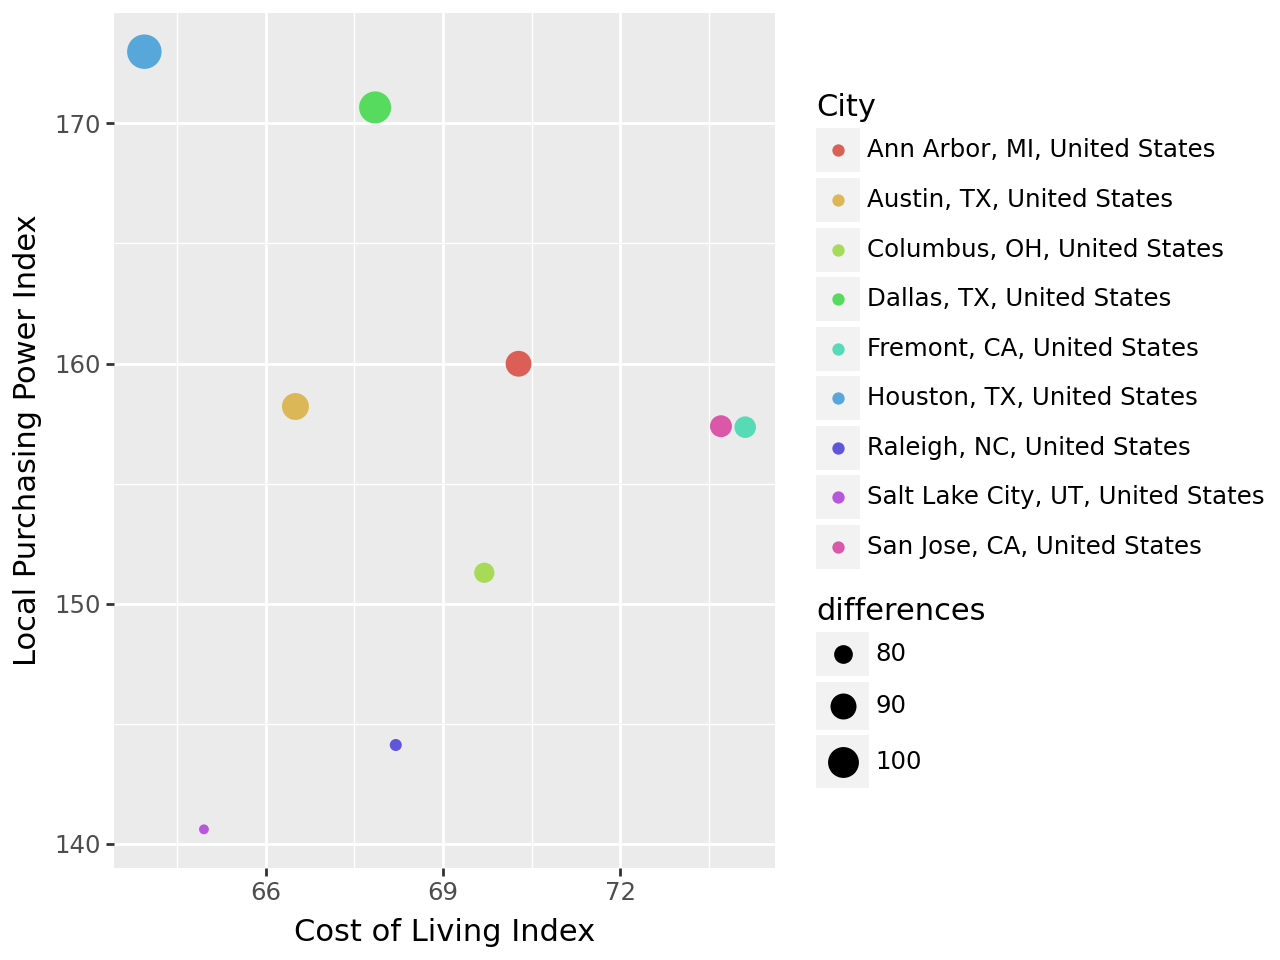

In [42]:

(
    ggplot(top_10)
    + aes(x="Cost of Living Index", y="Local Purchasing Power Index", size = "differences")
    + geom_point(aes(color= "City")) 
    
) #Houston Texas is a clear winner here

Texas holds the majority of cities that have the biggest differences between the COL and purchasing power, in a positive way. This may be valuable information when  looking for work, as well as what companies are in those areas, and what they are paying.  Another avenue to potentially look at could be living in those areas but working remotely in an area that pays even more? Saving the remote breakdown for later.

In [45]:
print(onsite_agg) #median salary for all US based companies is $140k, now I want to know if our Top 5 locations
#pay at or above our median salary.

                           mean    median
company_location                         
CA                 77787.000000   75774.0
CL                 40038.000000   40038.0
DE                 25532.000000   25532.0
ES                 41136.666667   38776.0
GB                 76958.000000   76958.0
IL                119059.000000  119059.0
IN                 23840.000000   23420.5
MY                 40000.000000   40000.0
NG                 50000.000000   50000.0
PL                 35590.000000   35590.0
UA                 13400.000000   13400.0
US                147774.016949  140000.0


In [46]:
FYI_onsite= FYI.loc[FYI['title'] == 'Data Scientist']



In [48]:
agg_FYI = FYI_onsite.groupby(['location']).agg(
    median_salary=('totalyearlycompensation', np.median),
    
)
agg_FYI.reset_index(inplace=True)

C:\Users\mnoon\AppData\Local\Temp\ipykernel_6992\3053298991.py:1: FutureWarning: The provided callable <function median at 0x0000016A0D02E480> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.


In [50]:
agg_FYI[agg_FYI.location.isin(["Houston, TX","Dallas, TX", "Austin, TX", "Ann Arbor, MI", "San Jose, CA"])]
#looking at this we can see only 3 of the TOP 5 are at or above or national median of $140k

,location,median_salary
4,"Ann Arbor, MI",164000.0
11,"Austin, TX",146000.0
57,"Dallas, TX",115000.0
85,"Houston, TX",120000.0
176,"San Jose, CA",205000.0


What I can gather from this information is that while Houston, and Dallas have a great COL and Purchase Power relationship, the median salaries are below the national average. So I wouldn't count those towards the Top 5 on-site locations. Something to look into could be WHY they are lower than average...could be alot of factors...COL is lower which generally means pay is lower, those locations may have smaller companies with less of a budget, there could also be some outliers pulling the median down. I used median though to adjust for outliers as opposed to using mean.
Do I want to explore those? Let's find the Top 5 for onsite, hybrid(which will probably be the same honestly bc you still have to go on-site, and remote, and then see if we want to go deeper here. But the questions are being asked. 

In [51]:
agg_FYI[agg_FYI.location.isin(["Fremont, CA","Columbus, OH", "Raleigh, NC", "Salt Lake City, UT"])] #adding Fremont, but SLC has no on-site data science companies

,location,median_salary
55,"Columbus, OH",124000.0
72,"Fremont, CA",210000.0
159,"Raleigh, NC",120000.0


In [52]:
agg_FYI[agg_FYI.location.isin(["Jersey City, NJ","San Antonio, TX", "Charlotte, NC", "Jacksonville, FL"])] 
#referenced my unicorn dataframe and just went down the list for the next contenders in descending order in the diffrences column.
#Jersey City wins it.

,location,median_salary
46,"Charlotte, NC",155000.0
96,"Jersey City, NJ",189000.0
172,"San Antonio, TX",257500.0


In [55]:
top_15 = unicorn.nlargest(n=15, columns=['differences'])
top_15.reset_index(inplace=True)



In [58]:
top_onsite_drop = top_15.drop(index=[0, 1, 2, 7, 8, 9, 11, 12, 13, 14])

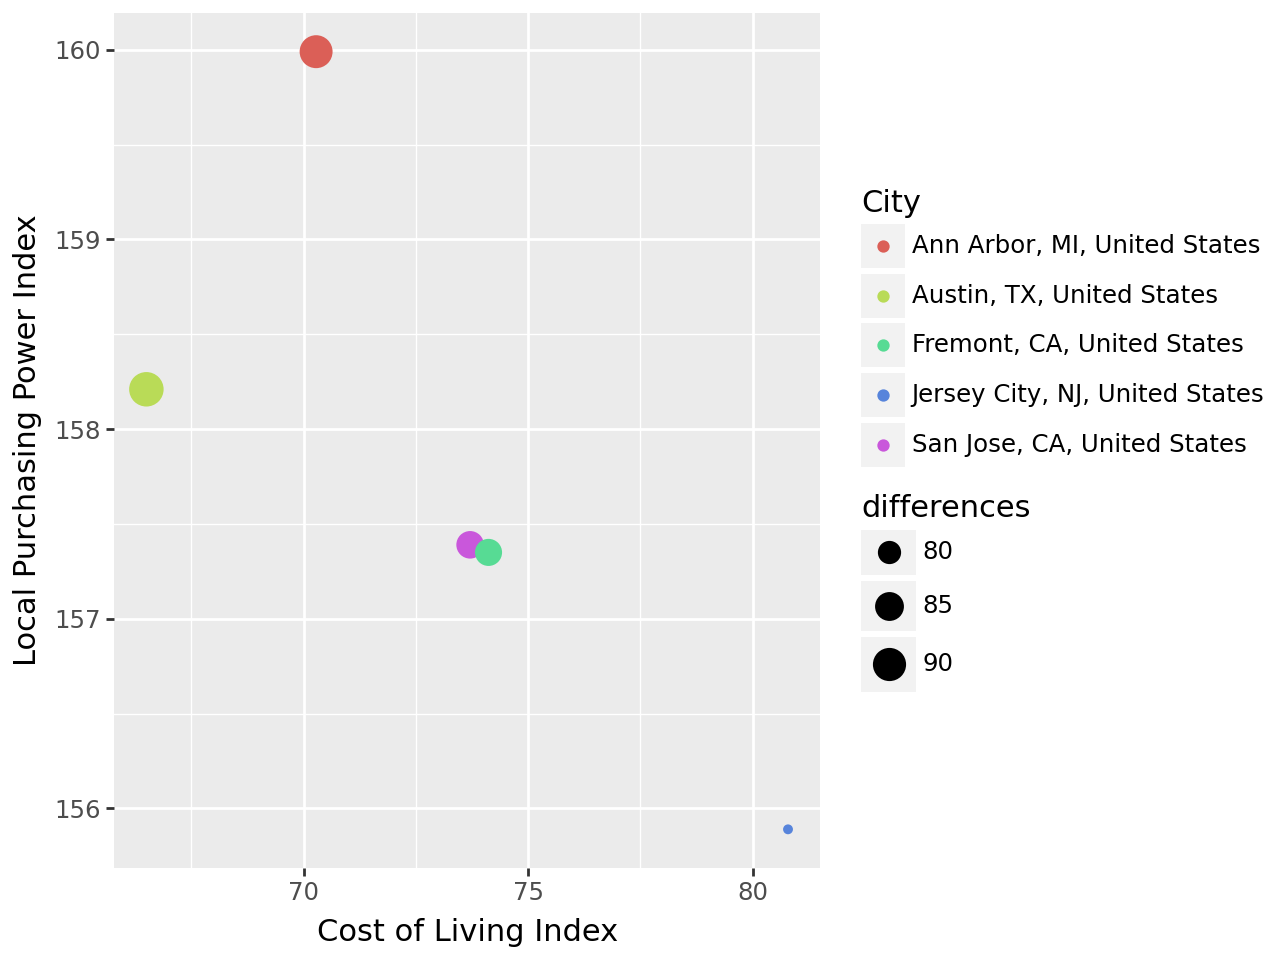

In [59]:
(
    ggplot(top_onsite_drop)
    + aes(x="Cost of Living Index", y="Local Purchasing Power Index", size = "differences")
    + geom_point(aes(color= "City")) 
    
)

In [69]:
FYI_onsite.loc[FYI_onsite["location"]== "Austin, TX"].head() #just to show whatthis looks like. did a full view in Spyder to get companies


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
1996,10/16/2018 14:21:06,Indeed,1,Data Scientist,100000,"Austin, TX",1.0,1.0,business intelligence,85000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3296,12/21/2018 6:47:06,Electronic Arts,Senior,Data Scientist,100000,"Austin, TX",2.0,2.0,ML / AI,88000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3297,12/21/2018 6:47:06,Electronic Arts,Senior,Data Scientist,100000,"Austin, TX",2.0,2.0,ML / AI,88000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
15002,1/15/2020 10:28:44,Dell Technologies,i7,Data Scientist,113000,"Austin, TX",1.0,0.0,ML / AI,105000.0,...,0,0,0,0,0,0,0,0,NaN,Master's Degree
20063,4/26/2020 12:23:27,Dell Technologies,I8,Data Scientist,134000,"Austin, TX",2.0,2.0,ML / AI,111000.0,...,0,0,0,0,0,0,0,0,NaN,Master's Degree


In [71]:
FYI_onsite.loc[FYI_onsite["location"]== "Ann Arbor, MI"].head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
12274,10/21/2019 17:12:54,Cisco,Grade 8,Data Scientist,164000,"Ann Arbor, MI",3.0,3.0,ML / AI,140000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
22406,6/11/2020 17:21:26,MITRE,5,Data Scientist,170000,"Ann Arbor, MI",23.0,14.0,ML / AI,170000.0,...,0,0,0,0,0,0,0,0,NaN,Master's Degree
60419,8/5/2021 19:47:53,XPO Logistics,L4,Data Scientist,142000,"Ann Arbor, MI",12.0,4.0,General,123000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [72]:
FYI_onsite.loc[FYI_onsite["location"]== "San Jose, CA"].head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
444,6/8/2018 17:55:09,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1398,9/23/2018 13:26:28,PayPal,5,Data Scientist,220000,"San Jose, CA",7.0,2.5,data,150000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2162,10/27/2018 12:49:19,IBM,7,Data Scientist,137000,"San Jose, CA",2.0,1.0,ML / AI,135000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3173,12/13/2018 20:37:34,PayPal,T24,Data Scientist,182000,"San Jose, CA",5.0,2.0,ML / AI,140000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4110,2/5/2019 8:46:34,eBay,25,Data Scientist,176000,"San Jose, CA",2.0,2.0,ML / AI,140000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [73]:
FYI_onsite.loc[FYI_onsite["location"]== "Fremont, CA"].head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
7773,6/17/2019 22:22:26,Tesla,Senior Engineer,Data Scientist,185000,"Fremont, CA",1.0,1.0,ML / AI,135000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
22918,6/22/2020 11:33:19,Facebook,IC5,Data Scientist,300000,"Fremont, CA",11.0,2.0,Data,190000.0,...,0,0,0,0,0,0,0,0,NaN,Master's Degree
33605,10/23/2020 23:54:54,Tesla,P1,Data Scientist,175000,"Fremont, CA",0.0,0.0,Data,140000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
33845,10/26/2020 22:52:19,Tesla,P2,Data Scientist,210000,"Fremont, CA",2.0,2.0,Production,160000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
55822,6/27/2021 23:05:46,Facebook,IC4,Data Scientist,226000,"Fremont, CA",10.0,2.0,Infra,160000.0,...,0,0,0,0,1,0,0,0,White,Master's Degree


In [74]:
FYI_onsite.loc[FYI_onsite["location"]== "Jersey City, NJ"].head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
9691,8/15/2019 0:05:18,Goldman Sachs,Executive Director / Vice-President,Data Scientist,210000,"Jersey City, NJ",12.0,3.0,ML / AI,170000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
17233,2/21/2020 14:58:03,JPMorgan Chase,VP,Data Scientist,160000,"Jersey City, NJ",20.0,5.0,Data,145000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
42678,2/21/2021 15:26:25,Jp morgan chase,Vice President,Data Scientist,210000,"Jersey City, NJ",6.0,2.0,General,160000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
43867,3/4/2021 4:44:27,Fidelity Investments,6,Data Scientist,189000,"Jersey City, NJ",8.0,8.0,General,135000.0,...,0,0,0,0,1,0,0,0,White,Master's Degree
60927,8/10/2021 11:27:21,JPMorgan Chase,601,Data Scientist,121000,"Jersey City, NJ",1.0,1.0,"ML, NLP",115000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree


### Hybrid
Again, I feel that as far as locations, these will be the same, as hybrid requires being in office a few days per week. 
What I can look at here, is at least the median ranges of pay for hybrid work.

In [78]:
hybrid_agg.loc["US"]

mean      113166.666667
median    117500.000000
Name: US, dtype: float64

Our median salary is actually much less than onsite, so our TOP 5 hybrid locations can actually change. Looks like our original TOP 5 will work in this scenario.

In [79]:
#referring back to this 
agg_FYI[agg_FYI.location.isin(["Houston, TX","Dallas, TX", "Austin, TX", "Ann Arbor, MI", "San Jose, CA"])]

,location,median_salary
4,"Ann Arbor, MI",164000.0
11,"Austin, TX",146000.0
57,"Dallas, TX",115000.0
85,"Houston, TX",120000.0
176,"San Jose, CA",205000.0


While Dallas is just shy of the $117.5k national median, I think the COL and Purchase Power difference is enough to offset the slightly less median pay. 

### Remote
This is where we will see some differences. Working remotely, the best scenario would be living in a low COL and high purchase power location, while working remotely at a higher paying company. Initial review, I do have to weed out some outliers, for instance Illinois City, IL, looks like they have a median salary of $510k, but there is only one company reported, not a true median value.

In [106]:
agg_FYI.nlargest(n=12, columns=['median_salary']) #I want too see now if any of these top values are a similar situation and not count them, 
#and/or get an overall median salary of all locations nationwide based on my FYI dataframe.

,location,median_salary
90,"Illinois City, IL",510000.0
102,"Kirkland, WA",505500.0
108,"Los Gatos, CA",420000.0
222,"Worcester, MA",375000.0
144,"Oakland, CA",350000.0
103,"La Jolla, CA",300000.0
160,"Raritan, NJ",300000.0
41,"Campbell, CA",290000.0
131,"Mountain View, MO",283000.0
22,"Berkeley, CA",277000.0


In [93]:
agg_FYI['median_salary'].median() #median salary of all locations is below the national average of 140.4k for remote work. But we want
#the big bucks, so going for the gusto here.

129500.0

In [81]:
FYI_onsite.loc[FYI_onsite['location']=='Illinois City, IL'] #using the onsite because there is no remote/onsite breakdown
#in this dataframe, so no need to make multiples with same information

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
12704,11/4/2019 5:30:38,Goldman Sachs,5,Data Scientist,510000,"Illinois City, IL",8.0,2.0,Web Development (Front-End),450000.0,...,1,0,0,0,0,0,0,0,NaN,PhD


In [82]:
FYI_onsite.loc[FYI_onsite['location']=='Kirkland, WA'] #more data here

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
510,6/20/2018 0:49:11,Google,L6,Data Scientist,690000,"Kirkland, WA",10.0,0.0,ML / AI,240000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
32297,10/9/2020 12:00:22,ServiceNow,IC4,Data Scientist,326000,"Kirkland, WA",7.0,0.0,ML / AI,205000.0,...,1,0,0,0,1,0,0,0,White,PhD
35478,11/17/2020 22:09:19,Google,L4,Data Scientist,203000,"Kirkland, WA",5.0,5.0,DevOps,189000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62529,6/12/2018 20:54:06,Google,T6,Data Scientist,685000,"Kirkland, WA",22.0,2.0,ML / AI,221000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [84]:
FYI_onsite.loc[FYI_onsite['location']=='Los Gatos, CA'].head() #plenty more data here, so cane rule out outlier for purposes of median values

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
513,6/21/2018 10:54:35,Netflix,Senior,Data Scientist,600000,"Los Gatos, CA",3.0,1.0,ML / AI,600000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1934,10/13/2018 6:05:30,Netflix,Senior,Data Scientist,400000,"Los Gatos, CA",2.0,2.0,Exp,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2604,11/6/2018 14:08:01,Netflix,Data Engineer,Data Scientist,425000,"Los Gatos, CA",10.0,7.0,Data Engineering,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4347,2/15/2019 20:38:59,Netflix,Manager,Data Scientist,655000,"Los Gatos, CA",5.0,2.0,Data Science,655000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
6625,5/20/2019 22:31:17,Netflix,Senior Data Scientist,Data Scientist,368000,"Los Gatos, CA",0.0,0.0,ML / AI,350000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [85]:
FYI_onsite.loc[FYI_onsite['location']=='Worcester, MA'] #only one here, will remove as Top 5 work location bc can not count on this median to be accurate

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
47805,4/10/2021 14:55:38,Lyft,T5,Data Scientist,375000,"Worcester, MA",5.0,0.0,Algorithms,190000.0,...,1,0,0,1,0,0,0,0,Asian,PhD


In [86]:
FYI_onsite.loc[FYI_onsite['location']=='Oakland, CA']

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
35300,11/15/2020 14:47:09,Microsoft,64,Data Scientist,350000,"Oakland, CA",4.0,2.0,ML / AI,204000.0,...,0,0,0,0,1,0,0,0,White,Master's Degree
37855,12/21/2020 13:00:12,Pandora,Staff,Data Scientist,310000,"Oakland, CA",11.0,6.0,ML / AI,200000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
48110,4/13/2021 11:00:09,Credit Karma,L5,Data Scientist,520000,"Oakland, CA",9.0,3.0,Machine Learning,236000.0,...,0,0,0,0,1,0,0,0,White,Master's Degree


In [87]:
FYI_onsite.loc[FYI_onsite['location']=='La Jolla, CA'] #also only one, so do not want to use this location

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
45557,3/20/2021 5:18:06,Johnson & Johnson,Director,Data Scientist,300000,"La Jolla, CA",20.0,15.0,General,210000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [94]:
FYI_onsite.loc[FYI_onsite['location']=='Raritan, NJ']

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
12584,10/31/2019 19:15:53,Johnson and Johnson,D1,Data Scientist,300000,"Raritan, NJ",19.0,13.0,ML / AI,200000.0,...,0,0,0,0,0,0,0,0,NaN,Master's Degree


In [95]:
FYI_onsite.loc[FYI_onsite['location']=='Campbell, CA']

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
25268,7/29/2020 21:42:13,Ebay,MTS2,Data Scientist,290000,"Campbell, CA",15.0,5.0,ML / AI,200000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [96]:
FYI_onsite.loc[FYI_onsite['location']=='Mountainview, MO']

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education


In [97]:
FYI_onsite.loc[FYI_onsite['location']=='Berkeley, CA']

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
4930,3/13/2019 14:36:37,Microsoft,62,Data Scientist,245000,"Berkeley, CA",3.0,1.0,ML / AI,160000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
11040,9/17/2019 20:49:29,Microsoft,63,Data Scientist,309000,"Berkeley, CA",3.0,3.0,ML / AI,186000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
23324,6/30/2020 22:17:28,Microsoft,66,Data Scientist,390000,"Berkeley, CA",5.0,2.0,ML / AI,285000.0,...,1,0,0,0,0,0,0,0,NaN,Master's Degree
50927,5/9/2021 19:59:24,Bayer,VS 1.3,Data Scientist,205000,"Berkeley, CA",6.0,0.0,General,165000.0,...,1,0,0,0,1,0,0,0,White,PhD


In [99]:
FYI_onsite.loc[FYI_onsite['location']=='Boulder, CO'] #Finally have our number 5 company location winner

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
5039,3/18/2019 14:19:21,Twitter,II,Data Scientist,211000,"Boulder, CO",3.0,2.0,ML / AI,136000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
19160,4/6/2020 13:45:37,Twitter,L6,Data Scientist,266000,"Boulder, CO",4.0,3.0,data science,151000.0,...,0,0,0,0,0,0,0,0,NaN,Master's Degree
21375,5/22/2020 12:37:17,Workday,P3,Data Scientist,244000,"Boulder, CO",5.0,1.0,ML / AI,154000.0,...,0,0,0,0,0,0,0,0,NaN,Master's Degree
37401,12/16/2020 2:32:33,Twitter,Senior SWE,Data Scientist,290000,"Boulder, CO",17.0,6.0,ML / AI,170000.0,...,0,0,0,0,0,1,0,0,Two Or More,Master's Degree
52197,5/23/2021 16:25:45,Workday,P4,Data Scientist,265000,"Boulder, CO",5.0,2.0,General,165000.0,...,0,0,0,0,1,0,0,0,White,Master's Degree
58769,7/23/2021 12:55:03,Workday,P4,Data Scientist,311000,"Boulder, CO",6.0,2.0,Research,175000.0,...,0,0,0,0,1,0,0,0,White,Master's Degree


In [109]:
international = unicorn[~unicorn.City.str.contains("States")] #wanted to know Top 5 international locations for living

In [110]:
international.nlargest(n=5, columns=['differences'])

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,differences
547,NaN,"Cyberjaya, Selangor, Malaysia",24.85,6.93,16.45,26.29,14.60,128.47,103.62
524,NaN,"Bangalore, India",28.20,8.59,19.01,31.14,20.04,102.64,74.44
271,NaN,"Erlangen, Germany",64.54,24.83,45.93,49.25,67.89,131.75,67.21
295,NaN,"Aachen, Germany",61.81,21.74,43.03,49.49,57.99,116.48,54.67
162,NaN,"Red Deer, Canada",71.73,22.46,48.64,70.32,65.19,123.94,52.21


In [112]:
int_top5 = international.nlargest(n=5, columns=['differences'])

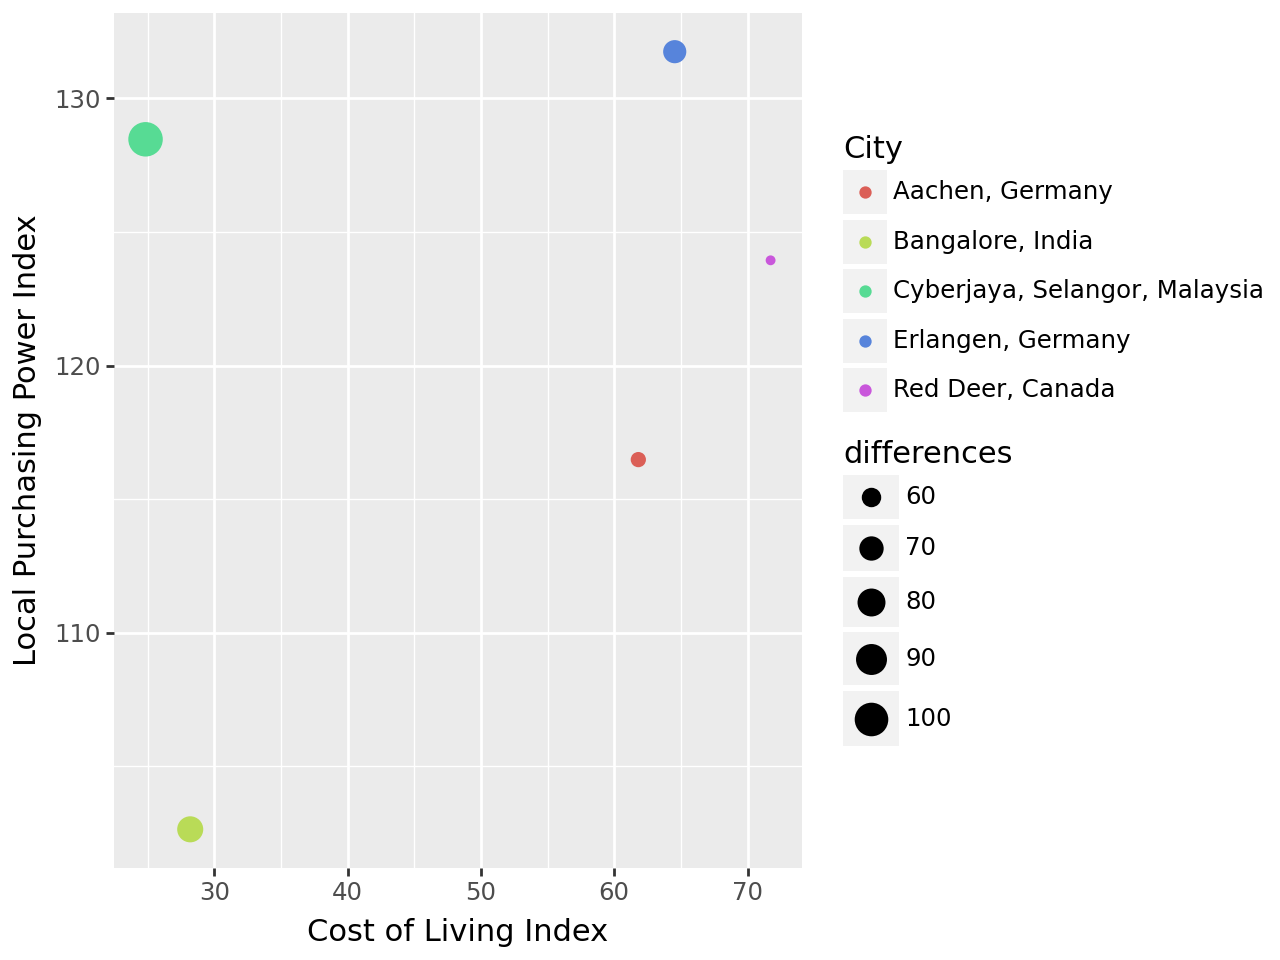

In [113]:
(
    ggplot(int_top5)
    + aes(x="Cost of Living Index", y="Local Purchasing Power Index", size = "differences")
    + geom_point(aes(color= "City")) 
    
)

In summary, remote, hybrid, and onsite, have some differences in locations as well as pay. 
Hybrid seems to pay the lowest median, as compared to remote and onsite, which are nearly identical.
The United States paid the most across all types of work.
I used totaly yearly compensation from the FYI datasets, which included bonuses. I think another way to go would have been base salary, as not all companies or locations will pay bonuses, base salary probably would have been a more accurate measure. This could have led to which companies are paying bonuses, and in which type of work role (remote vs. hybrid. vs. onsite)
Another avenue to pursue, would have been quality of life(safety, health, etc) however, I could not find a proper dataset without having to pay for it. 
As far as COL and Local Purchase Power, I feel ideally you want a location with COL under 100 (as compared to the base of NYC) and a purchase power of over 100. I feel like you get the most bang for your buck that way. Also I think you would want a bigger difference between the two. 
A COL of 90 and purchase power of 110, would be better than a COL of 90 and purchase power of 105, just as a small example. 